In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# mount google drive and copy dataset
from google.colab import drive
drive.mount('/content/drive')

%cp '/content/drive/My Drive/university_admission_prediction/dataset/Admission_Predict.csv' '/content/'

Mounted at /content/drive


In [ ]:
data = pd.read_csv('Admission_Predict.csv')

In [ ]:
data.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [ ]:
data.drop(["Serial No."],axis=1,inplace=True)
data.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [ ]:
data.describe()

GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit   
count  400.000000  400.000000        400.000000  
mean     8.598925    0.547500          0.724350  
std      0.596317    0.498362          0.142609  
min      6.800000    0.000000          0.340000  
25%      8.170000    0.000000          0.640000  
50%      8.610000    1.000000          0.730000  
75%      9.062500    1.000000          0.830000  
max      9.920000    1.000000          0.970000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
data = data.rename(columns = {'Chance of Admit ':'Chance of Admit'})
data.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

In [ ]:
data.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [ ]:
data.corr()

GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit  
GRE Score          0.557555  0.833060  0.580391         0.802610  
TOEFL Score        0.567721  0.828417  0.489858         0.791594  
University Rating  0.660123  0.746479  0.447783         0.711250  
SOP                0.729593  0.718144  0.444029         0.675732  
LOR                1.000000  0.670211  0.396859         0.669889  
CGPA               0.670211  1.000000  0.521654         0.873289  
Research           0.396859  0.521654  1.000000         0.553202  
Chance of Admit    0.669889  0.873289  0.553202         1.000000

<Axes: >

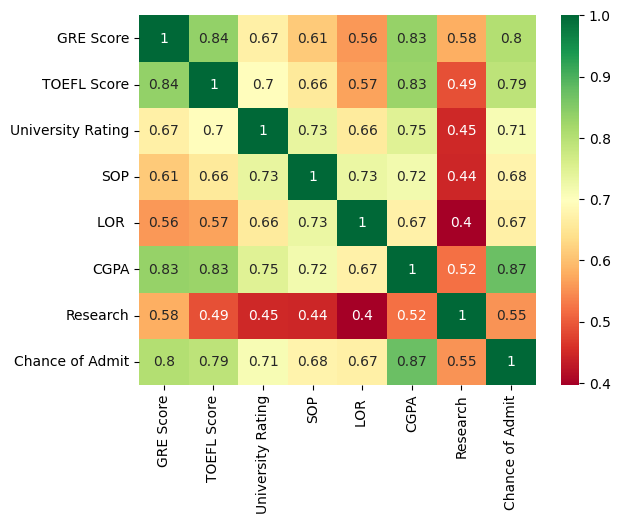

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

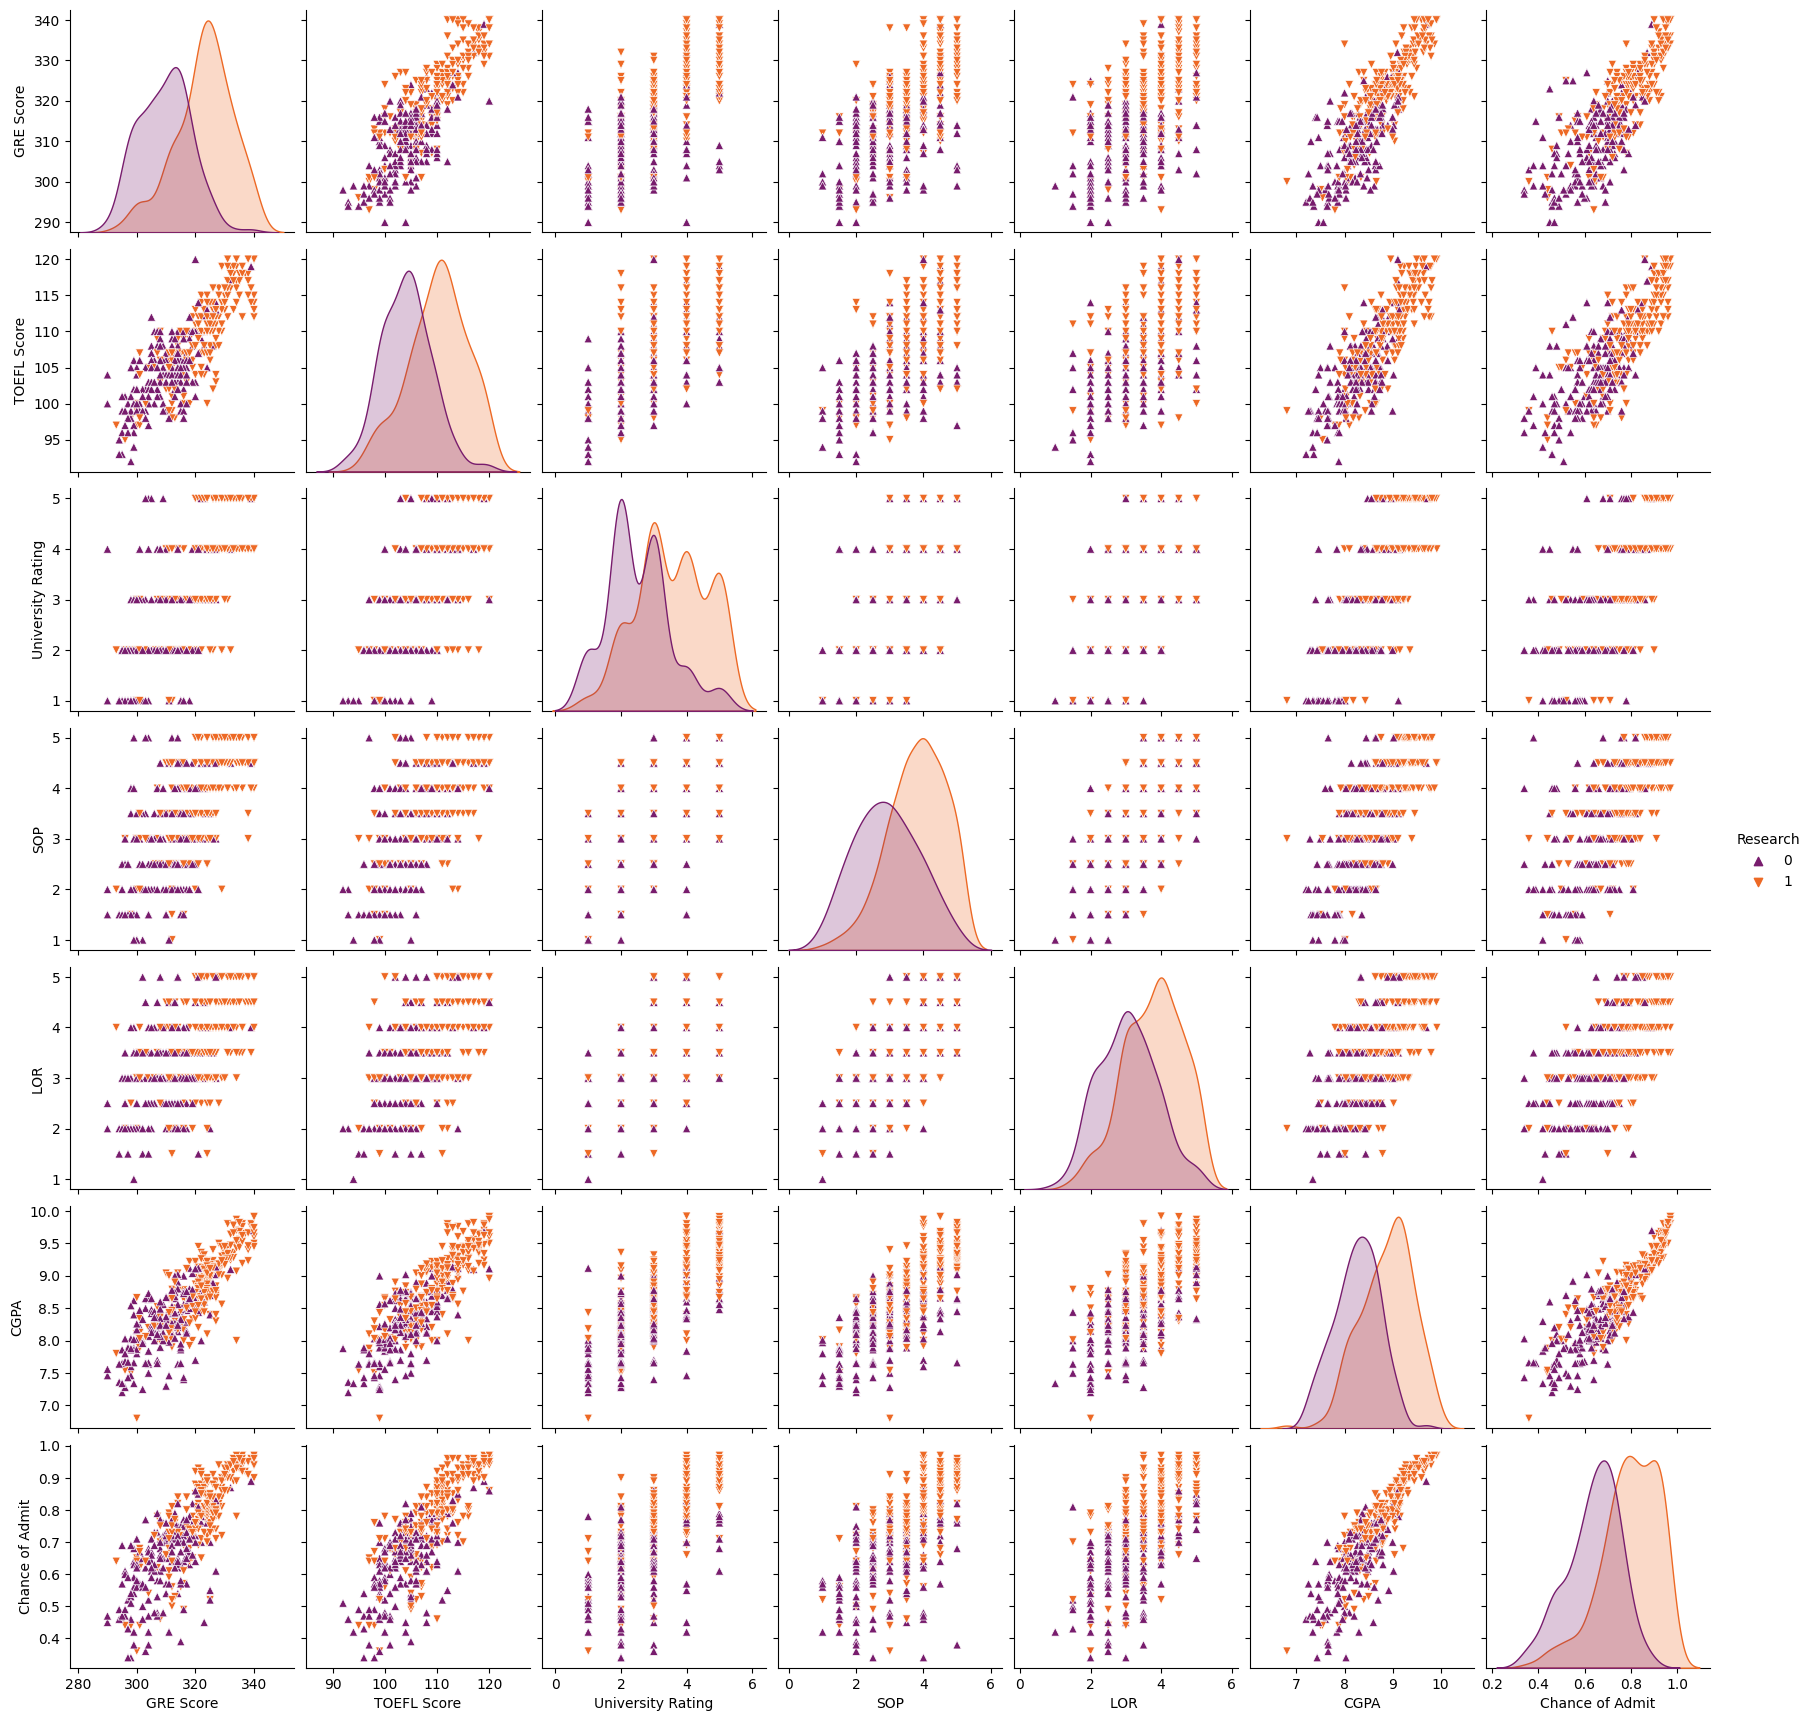

In [ ]:
sns.pairplot(data=data,hue='Research', markers=["^", "v"], palette='inferno')

<Axes: xlabel='University Rating', ylabel='CGPA'>

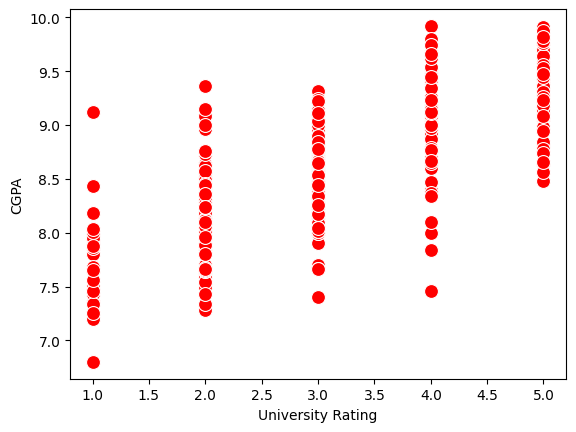

In [ ]:
sns.scatterplot(x='University Rating', y='CGPA', data=data, color='Red', s=100)

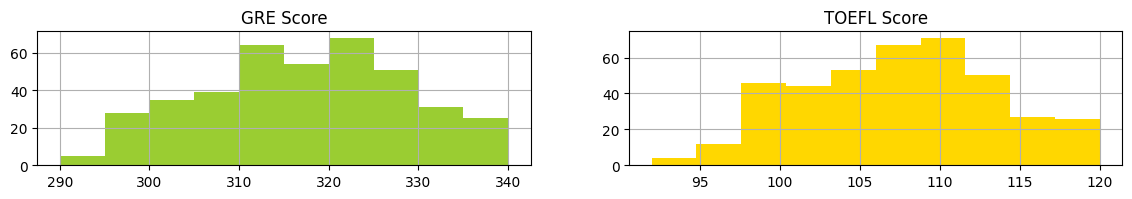

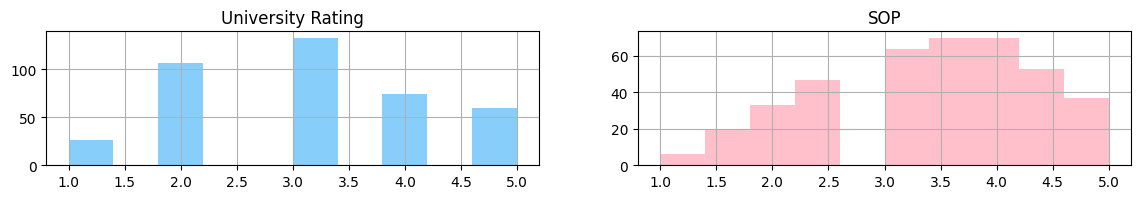

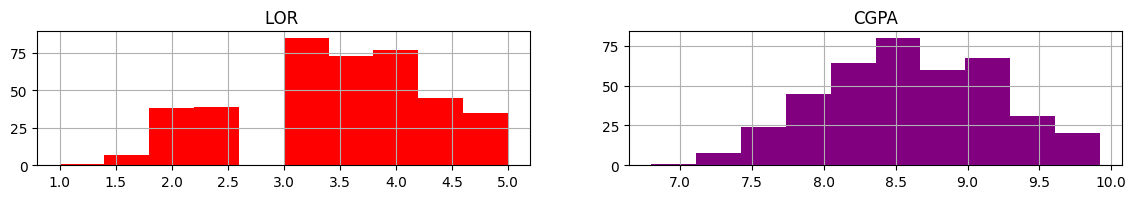

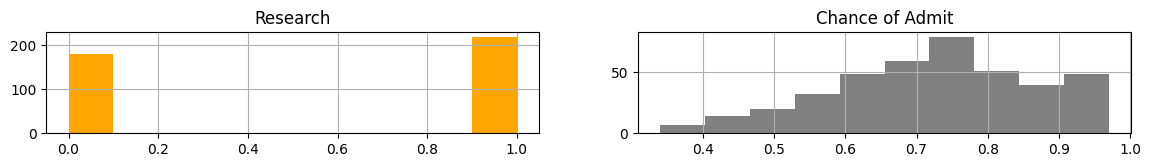

In [ ]:
category = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit']
color = ['yellowgreen', 'gold', 'lightskyblue', 'pink', 'red', 'purple', 'orange', 'gray']
start = True

for i in np.arange(4):
    fig = plt.figure(figsize=(14,8))
    plt.subplot2grid((4,2), (i,0))
    data[category[2*i]].hist(color=color[2*i], bins=10)
    plt.title(category[2*i])
    plt.subplot2grid((4,2), (i,1))
    data[category[2*i+1]].hist(color=color[2*i+1], bins=10)
    plt.title(category[2*i+1])

plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [ ]:
x = data.iloc[:,0:-1].values
y = data['Chance of Admit'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

y_train = (y_train>0.5)
y_test = (y_test>0.5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, classification_report, confusion_matrix

cls = LogisticRegression(random_state=0)
lr = cls.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Logistic Regression")
print("Accuracy score : %f" %(accuracy_score(y_test, y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f" %(roc_auc_score(y_test, y_pred) * 100))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))

Logistic Regression
Accuracy score : 87.500000
Recall score : 100.000000
ROC score : 50.000000
Confusion Matrix 
 [[ 0 10]
 [ 0 70]]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=7, activation='relu', input_dim=7))

In [ ]:
model.add(Dense(units=7, activation='relu'))

In [ ]:
model.add(Dense(units=1, activation='linear'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2118 - accuracy: 0.9281
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2103 - accuracy: 0.9281
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.2092 - accuracy: 0.9281
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2086 - accuracy: 0.9281
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2084 - accuracy: 0.9281
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2072 - accuracy: 0.9312
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.2066 - accuracy: 0.9312
Epoch 8/100
16/16 [==============================] - 0s 9ms/step - loss: 0.2067 - accuracy: 0.9312
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.2058 - accuracy: 0.9312
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.2050 - accuracy: 0.9312
Epoch 11/

In [ ]:
ann_pred_tr = model.predict(x_train)
print(ann_pred_tr)

10/10 [==============================] - 0s 2ms/step
[[1.1659797 ]
 [1.2464826 ]
 [1.9496695 ]
 [0.9997218 ]
 [0.7984851 ]
 [1.161485  ]
 [1.3990479 ]
 [1.2182487 ]
 [1.812677  ]
 [1.0665838 ]
 [0.90455514]
 [1.5609401 ]
 [0.55158216]
 [1.1878558 ]
 [0.8404469 ]
 [1.0434524 ]
 [1.1380981 ]
 [1.2840469 ]
 [0.7263538 ]
 [1.307327  ]
 [1.0989944 ]
 [0.84802777]
 [1.1670483 ]
 [1.3818789 ]
 [1.2268969 ]
 [0.9124365 ]
 [0.9491717 ]
 [0.788024  ]
 [1.0271555 ]
 [0.8622387 ]
 [0.96847606]
 [0.995249  ]
 [0.6654349 ]
 [0.8857574 ]
 [1.6144438 ]
 [0.8832684 ]
 [0.47630844]
 [1.5982643 ]
 [1.2998719 ]
 [1.5456327 ]
 [0.9479347 ]
 [0.93734545]
 [0.99973524]
 [0.35015008]
 [1.724817  ]
 [1.3941329 ]
 [1.3325704 ]
 [0.9513187 ]
 [0.9453948 ]
 [1.2890598 ]
 [1.505834  ]
 [1.1241236 ]
 [1.3667225 ]
 [1.3546215 ]
 [1.1741034 ]
 [1.214382  ]
 [1.292426  ]
 [1.0055559 ]
 [1.3226632 ]
 [1.489653  ]
 [1.0797732 ]
 [1.4036678 ]
 [0.6865502 ]
 [1.180652  ]
 [0.97194666]
 [1.810835  ]
 [0.8962222 ]
 [1.34452

In [ ]:
train_acc = model.evaluate(x_train, y_train, verbose=0)[1]
print(train_acc)

0.9437500238418579


In [ ]:
test_acc = model.evaluate(x_test, y_test, verbose=0)[1]
print(test_acc)

0.9125000238418579


In [ ]:
ann_pred = model.predict(x_test)
ann_pred = (ann_pred>0.5)
ann_pred_tr = (ann_pred_tr>0.5)

3/3 [==============================] - 0s 3ms/step


In [ ]:
ann_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
print("ANN Model \n")

print("Train Prediction \n")
print("Confusion Matrix \n", confusion_matrix(y_train, ann_pred_tr))
print("\n Classification Report \n", classification_report(y_train, ann_pred_tr))

print("Prediction \n")
print("Confusion Matrix \n",confusion_matrix(y_test, ann_pred))
print("\nClassification Report \n", classification_report(y_test, ann_pred))

ANN Model 

Train Prediction 

Confusion Matrix 
 [[  7  18]
 [  0 295]]

 Classification Report 
               precision    recall  f1-score   support

       False       1.00      0.28      0.44        25
        True       0.94      1.00      0.97       295

    accuracy                           0.94       320
   macro avg       0.97      0.64      0.70       320
weighted avg       0.95      0.94      0.93       320

Prediction 

Confusion Matrix 
 [[ 3  7]
 [ 0 70]]

Classification Report 
               precision    recall  f1-score   support

       False       1.00      0.30      0.46        10
        True       0.91      1.00      0.95        70

    accuracy                           0.91        80
   macro avg       0.95      0.65      0.71        80
weighted avg       0.92      0.91      0.89        80



In [ ]:
# save and copy the saved model to mounted google drive
model.save('model.h5')

%cp '/content/model.h5' '/content/drive/My Drive/university_admission_prediction/training/'